# Ca Data

# Comparing during stimulation and no stimulation conditions using ttest at the group level (groups of subjects)

1) Photo bleaching (excluding first 500 samples) and normalization (Delta f/f)

2) Defining two windows (one for signal during stimulation (5 seconds and shifting back by 5 samples) and one for signal during no stimulation (25 seconds after stimulation offsets)

3) Averaging all windows across all runs for each subjects

4) Averaging across all 50 samples in these two windows to get a vector :(540,1) for each subject to get pvalue and statistic

5) Calculating T-test for each 540 ROIs 

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
def avg(subject, type):
    subject=subject
    type=type
    run=['run-1','run-2','run-3','run-4','run-5','run-6']
    ses=['ses-1','ses-2','ses-3']
    path_stim='/Users/sabatb/Documents/stim/*.*'
    if type == 'LED':
        path="/Users/sabatb/Documents/Ca2_Data/ca2/*.*"
        count_run_ses=0; count_total=0
        stim_t=np.empty((540,500)); stim_t[:]=np.nan; 
        rest_t=np.empty((540,500)); rest_t[:]=np.nan; 
        stim=np.empty((540,50)); stim[:]=np.nan; 
        rest=np.empty((540,50)); rest[:]=np.nan; 
        average_stim=np.empty((540,50)); average_stim[:]=np.nan; 
        average_rest=np.empty((540,50)); average_rest[:]=np.nan; 
        for file in glob.glob(path):
            load_data=np.load(file)
            base=os.path.basename(file)
            base=os.path.splitext(base)[0]
            for i in run:
                for j in ses:
                    if subject in base and i in base and j in  base and 'led' in base:
                        count_total=count_total+1
                        p=0
                        f0=np.nanmean(load_data[:,500:],axis=1)
                        mat_norm=np.empty((540,5999)); mat_norm[:]=np.nan;
                        for i_norm in range (540):
                            for j_norm in range (5999):
                                mat_norm[i_norm,j_norm]=(load_data[i_norm,j_norm]-f0[i_norm])/abs(f0[i_norm])
                        mat_stim=np.empty((540,10)); mat_stim[:]=np.nan; avg_stim=np.empty((540,50)); avg_stim[:]=np.nan
                        mat_rest=np.empty((540,10)); mat_rest[:]=np.nan; avg_rest=np.empty((540,50)); avg_rest[:]=np.nan
                        for file_stim in glob.glob(path_stim):
                            load_data_stim=pd.read_csv(file_stim, on_bad_lines='skip')
                            base_stim=os.path.basename(file_stim)
                            base_stim=os.path.splitext(base_stim)[0]
                            if subject in base_stim and i in base_stim and j in base_stim and 'led' in base_stim:
                                load_data_stim.drop(columns = load_data_stim.columns[0], axis = 1, inplace= True)
                                load_data_stim.drop(columns = load_data_stim.columns[0], axis = 1, inplace= True)    
                                result = np.where(load_data_stim == 1)[0]
                                res = []
                                for idx in range(1, len(result)):
                                    if result[idx] - result[idx-1] >60:
                                        res.append(result[idx]-5)
                                if 'sub-SLC06' in base_stim and 'ses-1' in base_stim and 'run-2' in base_stim:
                                    res = res[:-1] 
                                for window_j in range(50):
                                    m=0
                                    for window_i in res:
                                        mat_stim[:,m]=mat_norm[:,window_j+window_i]
                                        mat_rest[:,m]=mat_norm[:,window_j+window_i+300]
                                        m=m+1
                                    avg_stim[:,p]=np.nanmean(mat_stim, axis=1)
                                    avg_rest[:,p]=np.nanmean(mat_rest, axis=1)
                                    p=p+1
                                stim_t[:,count_run_ses:count_run_ses+50]=avg_stim
                                rest_t[:,count_run_ses:count_run_ses+50]=avg_rest
                                count_run_ses=count_run_ses+50
        for numbers1 in range(0,50): 
            k=0
            for numbers2 in range(0,(count_total)*50,50):   
                stim[:,k]=stim_t[:,numbers1+numbers2]
                rest[:,k]=rest_t[:,numbers1+numbers2]
                k=k+1
            average_stim[:,numbers1]=np.nanmean(stim, axis=1)
            average_rest[:,numbers1]=np.nanmean(rest, axis=1)

        return average_stim, average_rest


In [28]:
import numpy as np
import glob
import pandas as pd
import os
stim_subj01, rest_subj01=avg('sub-SLC01', 'LED')
stim_subj02, rest_subj02=avg('sub-SLC02', 'LED')
stim_subj03, rest_subj03=avg('sub-SLC03', 'LED')
stim_subj04, rest_subj04=avg('sub-SLC04', 'LED')
stim_subj05, rest_subj05=avg('sub-SLC05', 'LED')
stim_subj06, rest_subj06=avg('sub-SLC06', 'LED')
stim_subj07, rest_subj07=avg('sub-SLC07', 'LED')
stim_subj08, rest_subj08=avg('sub-SLC08', 'LED')
stim_subj09, rest_subj09=avg('sub-SLC09', 'LED')
stim_subj10, rest_subj10=avg('sub-SLC10', 'LED')

In [29]:
average_stim_subj01=np.nanmean(stim_subj01, axis=1)
average_rest_subj01=np.nanmean(rest_subj01, axis=1)
average_stim_subj02=np.nanmean(stim_subj02, axis=1)
average_rest_subj02=np.nanmean(rest_subj02, axis=1)
average_stim_subj03=np.nanmean(stim_subj03, axis=1)
average_rest_subj03=np.nanmean(rest_subj03, axis=1)
average_stim_subj04=np.nanmean(stim_subj04, axis=1)
average_rest_subj04=np.nanmean(rest_subj04, axis=1)
average_stim_subj05=np.nanmean(stim_subj05, axis=1)
average_rest_subj05=np.nanmean(rest_subj05, axis=1)
average_stim_subj06=np.nanmean(stim_subj06, axis=1)
average_rest_subj06=np.nanmean(rest_subj06, axis=1)
average_stim_subj07=np.nanmean(stim_subj07, axis=1)
average_rest_subj07=np.nanmean(rest_subj07, axis=1)
average_stim_subj08=np.nanmean(stim_subj08, axis=1)
average_rest_subj08=np.nanmean(rest_subj08, axis=1)
average_stim_subj09=np.nanmean(stim_subj09, axis=1)
average_rest_subj09=np.nanmean(rest_subj09, axis=1)
average_stim_subj10=np.nanmean(stim_subj10, axis=1)
average_rest_subj10=np.nanmean(rest_subj10, axis=1)

In [30]:
during_stim=np.empty((540,10)); during_stim[:]=np.nan
during_nostim=np.empty((540,10)); during_nostim[:]=np.nan
for i in range (540):
    m=0
    during_stim[i,m]=average_stim_subj01[i]
    during_nostim[i,m]=average_rest_subj01[i]
    m=m+1
    during_stim[i,m]=average_stim_subj02[i]
    during_nostim[i,m]=average_rest_subj02[i]
    m=m+1
    during_stim[i,m]=average_stim_subj03[i]
    during_nostim[i,m]=average_rest_subj03[i]
    m=m+1
    during_stim[i,m]=average_stim_subj04[i]
    during_nostim[i,m]=average_rest_subj04[i]
    m=m+1
    during_stim[i,m]=average_stim_subj05[i]
    during_nostim[i,m]=average_rest_subj05[i]
    m=m+1
    during_stim[i,m]=average_stim_subj06[i]
    during_nostim[i,m]=average_rest_subj06[i]
    m=m+1
    during_stim[i,m]=average_stim_subj07[i]
    during_nostim[i,m]=average_rest_subj07[i]
    m=m+1
    during_stim[i,m]=average_stim_subj08[i]
    during_nostim[i,m]=average_rest_subj08[i]
    m=m+1
    during_stim[i,m]=average_stim_subj09[i]
    during_nostim[i,m]=average_rest_subj09[i]
    m=m+1
    during_stim[i,m]=average_stim_subj10[i]
    during_nostim[i,m]=average_rest_subj10[i]
    m=m+1

In [31]:
from scipy import stats
pvalue=np.empty((540)); pvalue[:]=np.nan
statistic=np.empty((540)); statistic[:]=np.nan
for i in range (540):
    statistic[i]=stats.ttest_ind(during_stim[i], during_nostim[i], equal_var=False)[0]
    pvalue[i]=stats.ttest_ind(during_stim[i], during_nostim[i],equal_var=False)[1]
np.save('statistic_between', statistic)
np.save('pvalue_between', pvalue)

In [32]:
statistic=np.load('/Users/sabatb/Documents/Luiz1/statistic_between.npy')
p=np.where(pvalue<=0.01)[0]
for i in range(540):
    if i not in p:
        statistic[i]=np.nan
np.save('stat_between', statistic)        

# Plot


In [33]:
# HIDE CODE

import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# code
sys.path.insert(0, '/Users/sabatb/Documents/averaging/_Ca-fMRI')
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [34]:
topview = np.load('/Users/sabatb/Documents/averaging/topview.npy')
topview_mask = np.load('/Users/sabatb/Documents/averaging/topview_mask.npy')

In [35]:
mice = Mice(512)
bs = Base(mice, mode='ca2')

combine metadata not found, time to run cat_data() . . .

In [36]:
path = '/Users/sabatb/Documents/Luiz1'
x= np.load(pjoin(path, 'stat_between.npy'))
x.shape

(540,)

In [37]:
proj= bs.project_vec(x.T, layer=0, add_disjoint=False)
list(proj), proj['top'].shape

(['top', 'flat'], (1, 1320, 1140))

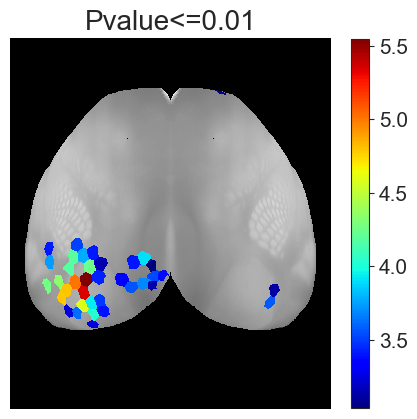

In [47]:
fig= plt.figure(figsize=(30, 30))
fig.add_subplot(1, 5, 1)
plt.imshow(topview, cmap='Greys_r')
plt.imshow(mwh(topview_mask == 0, proj['top'][i*10]),cmap='jet')
plt.title('Pvalue<=0.01', fontsize = 20)
plt.axis('off')
cbar =plt.colorbar(shrink=0.16);
tick_font_size = 15
cbar.ax.tick_params(labelsize=tick_font_size)
